In [350]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [358]:
N = 100
in_m = 1
in_w = 0
s_m = 0.1
s_w = 0.1
m_data = np.random.normal(in_m,s_m,N)
w_data = np.random.normal(in_w,s_w,2*N)
zero= np.zeros_like(m_data)
one = np.ones_like(w_data)
iter =10
K = 2


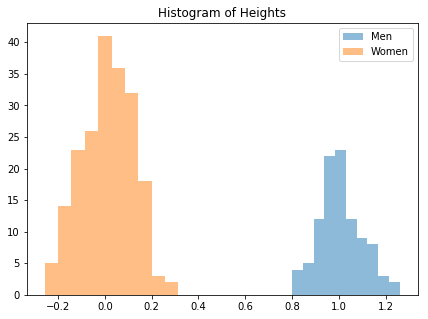

In [356]:
f, ax = plt.subplots(figsize = (7,5))
ax.set_title("Histogram of Heights")
ax.hist(m_data,alpha=.5,label = "Men")
ax.hist(w_data,alpha=.5,label = "Women")
ax.legend()

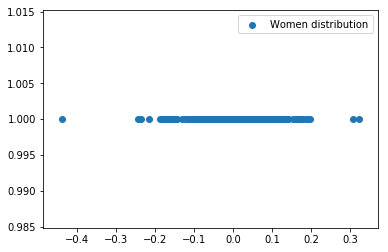

In [359]:
plt.scatter(w_data,one,label='Women distribution')
plt.legend()

In [360]:
m_pdf=stats.norm(in_m,s_m)
w_pdf=stats.norm(in_w,s_w)

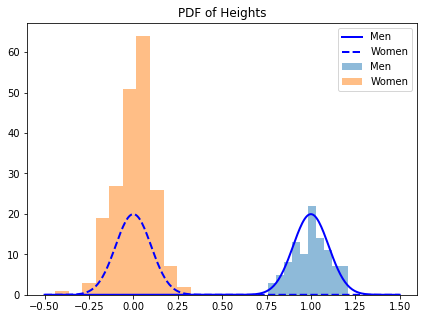

In [361]:
f, ax = plt.subplots(figsize = (7,5))
x = np.linspace(-0.5,1.5,300)
ax.set_title('PDF of Heights')
ax.plot(x,5*m_pdf.pdf(x),'k',linewidth=2,color='blue',label='Men')
ax.plot(x,5*w_pdf.pdf(x),'k--',linewidth=2,color='blue',label='Women')
ax.hist(m_data,alpha=.5,label = "Men")
ax.hist(w_data,alpha=.5,label = "Women")
ax.legend()

In [362]:
m_label=np.ones_like(m_data)
w_label=np.zeros_like(w_data)


In [363]:
m_label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [364]:
w_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [365]:
m = np.stack([m_label,m_data],1)

In [366]:
m

array([[1.        , 0.97727379],
       [1.        , 0.8490134 ],
       [1.        , 1.00987327],
       [1.        , 0.95012957],
       [1.        , 1.16117391],
       [1.        , 1.0206046 ],
       [1.        , 1.14271276],
       [1.        , 1.20015633],
       [1.        , 0.93273466],
       [1.        , 1.02358899],
       [1.        , 1.06573915],
       [1.        , 0.78349587],
       [1.        , 1.20951811],
       [1.        , 0.89686753],
       [1.        , 0.98944853],
       [1.        , 0.96555085],
       [1.        , 1.04381987],
       [1.        , 1.08181242],
       [1.        , 1.0458608 ],
       [1.        , 1.19708221],
       [1.        , 1.06171012],
       [1.        , 1.1159995 ],
       [1.        , 1.10762076],
       [1.        , 0.89899431],
       [1.        , 0.81728835],
       [1.        , 0.86760329],
       [1.        , 1.04440391],
       [1.        , 1.01068222],
       [1.        , 0.99373946],
       [1.        , 0.88980005],
       [1.

In [367]:
m[:,1]

array([0.97727379, 0.8490134 , 1.00987327, 0.95012957, 1.16117391,
       1.0206046 , 1.14271276, 1.20015633, 0.93273466, 1.02358899,
       1.06573915, 0.78349587, 1.20951811, 0.89686753, 0.98944853,
       0.96555085, 1.04381987, 1.08181242, 1.0458608 , 1.19708221,
       1.06171012, 1.1159995 , 1.10762076, 0.89899431, 0.81728835,
       0.86760329, 1.04440391, 1.01068222, 0.99373946, 0.88980005,
       1.01575657, 0.90795082, 1.0633751 , 0.75965177, 0.919588  ,
       1.0126679 , 1.19571377, 1.1233578 , 0.90968484, 1.12034341,
       1.01448449, 0.98698212, 1.07765706, 0.88697106, 0.95460322,
       1.08717397, 0.91976697, 1.09666445, 1.16650683, 0.98818816,
       1.08109651, 1.05400548, 0.9621785 , 0.90609141, 0.98610744,
       1.01424161, 0.97919975, 0.95775634, 1.11460437, 1.0175371 ,
       0.87825845, 1.17169429, 1.10691843, 0.88879926, 0.84722837,
       1.02543275, 1.03671772, 1.02697107, 1.05453645, 1.12589497,
       0.91329361, 0.83734688, 1.07449897, 0.85097568, 1.10679

In [ ]:
m[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [369]:
w = np.stack([w_label,w_data],1)


In [370]:
w

array([[ 0.        ,  0.10184674],
       [ 0.        , -0.15716171],
       [ 0.        , -0.14654118],
       [ 0.        , -0.10534247],
       [ 0.        ,  0.10912694],
       [ 0.        ,  0.13042118],
       [ 0.        ,  0.02778967],
       [ 0.        , -0.1789895 ],
       [ 0.        ,  0.01971574],
       [ 0.        , -0.0141455 ],
       [ 0.        , -0.03682265],
       [ 0.        ,  0.04002823],
       [ 0.        , -0.16811158],
       [ 0.        , -0.08105092],
       [ 0.        ,  0.16795096],
       [ 0.        ,  0.05908378],
       [ 0.        ,  0.05671469],
       [ 0.        ,  0.00186869],
       [ 0.        ,  0.04389396],
       [ 0.        ,  0.1102081 ],
       [ 0.        , -0.23723269],
       [ 0.        , -0.0348044 ],
       [ 0.        ,  0.00815335],
       [ 0.        ,  0.16015262],
       [ 0.        , -0.10772507],
       [ 0.        , -0.17621333],
       [ 0.        ,  0.05766535],
       [ 0.        , -0.02784531],
       [ 0.        ,

In [371]:
mw= np.concatenate([m,w])

In [372]:
mw

array([[ 1.        ,  0.97727379],
       [ 1.        ,  0.8490134 ],
       [ 1.        ,  1.00987327],
       [ 1.        ,  0.95012957],
       [ 1.        ,  1.16117391],
       [ 1.        ,  1.0206046 ],
       [ 1.        ,  1.14271276],
       [ 1.        ,  1.20015633],
       [ 1.        ,  0.93273466],
       [ 1.        ,  1.02358899],
       [ 1.        ,  1.06573915],
       [ 1.        ,  0.78349587],
       [ 1.        ,  1.20951811],
       [ 1.        ,  0.89686753],
       [ 1.        ,  0.98944853],
       [ 1.        ,  0.96555085],
       [ 1.        ,  1.04381987],
       [ 1.        ,  1.08181242],
       [ 1.        ,  1.0458608 ],
       [ 1.        ,  1.19708221],
       [ 1.        ,  1.06171012],
       [ 1.        ,  1.1159995 ],
       [ 1.        ,  1.10762076],
       [ 1.        ,  0.89899431],
       [ 1.        ,  0.81728835],
       [ 1.        ,  0.86760329],
       [ 1.        ,  1.04440391],
       [ 1.        ,  1.01068222],
       [ 1.        ,

In [373]:
mw_data = np.concatenate([m_data,w_data])

In [374]:
mw_data

array([ 0.97727379,  0.8490134 ,  1.00987327,  0.95012957,  1.16117391,
        1.0206046 ,  1.14271276,  1.20015633,  0.93273466,  1.02358899,
        1.06573915,  0.78349587,  1.20951811,  0.89686753,  0.98944853,
        0.96555085,  1.04381987,  1.08181242,  1.0458608 ,  1.19708221,
        1.06171012,  1.1159995 ,  1.10762076,  0.89899431,  0.81728835,
        0.86760329,  1.04440391,  1.01068222,  0.99373946,  0.88980005,
        1.01575657,  0.90795082,  1.0633751 ,  0.75965177,  0.919588  ,
        1.0126679 ,  1.19571377,  1.1233578 ,  0.90968484,  1.12034341,
        1.01448449,  0.98698212,  1.07765706,  0.88697106,  0.95460322,
        1.08717397,  0.91976697,  1.09666445,  1.16650683,  0.98818816,
        1.08109651,  1.05400548,  0.9621785 ,  0.90609141,  0.98610744,
        1.01424161,  0.97919975,  0.95775634,  1.11460437,  1.0175371 ,
        0.87825845,  1.17169429,  1.10691843,  0.88879926,  0.84722837,
        1.02543275,  1.03671772,  1.02697107,  1.05453645,  1.12

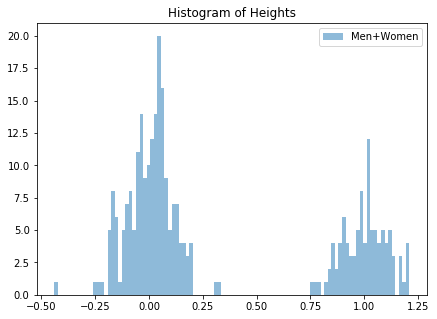

In [375]:
f, ax = plt.subplots(figsize = (7,5))
ax.set_title("Histogram of Heights")
ax.hist(mw_data,bins=100,alpha=.5,label = "Men+Women")
ax.legend()


In [376]:


class human:
    def __init__(self,data,target):
        
        self.data=data
        self.target=target
        
    def keys(self):
        print("[data,target]")
        
    def data(self):
        print(self.data)

    def target(self):
        print(self.target)
        

In [377]:

m_w = human(mw_data,mw[:,0])

In [378]:

m_w.keys()

[data,target]


In [379]:

m_w.data


array([ 0.97727379,  0.8490134 ,  1.00987327,  0.95012957,  1.16117391,
        1.0206046 ,  1.14271276,  1.20015633,  0.93273466,  1.02358899,
        1.06573915,  0.78349587,  1.20951811,  0.89686753,  0.98944853,
        0.96555085,  1.04381987,  1.08181242,  1.0458608 ,  1.19708221,
        1.06171012,  1.1159995 ,  1.10762076,  0.89899431,  0.81728835,
        0.86760329,  1.04440391,  1.01068222,  0.99373946,  0.88980005,
        1.01575657,  0.90795082,  1.0633751 ,  0.75965177,  0.919588  ,
        1.0126679 ,  1.19571377,  1.1233578 ,  0.90968484,  1.12034341,
        1.01448449,  0.98698212,  1.07765706,  0.88697106,  0.95460322,
        1.08717397,  0.91976697,  1.09666445,  1.16650683,  0.98818816,
        1.08109651,  1.05400548,  0.9621785 ,  0.90609141,  0.98610744,
        1.01424161,  0.97919975,  0.95775634,  1.11460437,  1.0175371 ,
        0.87825845,  1.17169429,  1.10691843,  0.88879926,  0.84722837,
        1.02543275,  1.03671772,  1.02697107,  1.05453645,  1.12

In [380]:

m_w.target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [447]:
original_std = np.std(mw_data)


In [448]:
original_std



0.48313181283962336

In [449]:
original_mean = np.mean(mw_data)


In [450]:
original_mean


0.336196894012523

In [474]:
mu = np.random.normal(original_mean,original_std,K)

In [475]:
mu

array([0.4137218 , 0.11510597])

In [476]:
std = np.full(K,original_std)


In [477]:
std

array([0.48313181, 0.48313181])

In [478]:
pi = np.full(K,1/K)

In [479]:
pi

array([0.5, 0.5])

In [480]:

mu_history = mu.reshape(1,K)
mu_history

array([[0.4137218 , 0.11510597]])

In [481]:

log_P_history = np.ones(1)
log_P_history

array([1.])

In [482]:
for i in range(iter):
    N_nk= norm.pdf(mw_data,mu[0],std[0])
    N_nk = N_nk.reshape(-1,1)
    
    for k in range(1,K):
        N_nk = np.hstack((N_nk,norm.pdf(mw_data,mu[k],std[k]).reshape(-1,1)))
        
    pi_N_nk = pi*N_nk

    sumN_nk=pi_N_nk.sum(axis=1)
    sumN_nk=sumN_nk.reshape(3*N,1)
    gamma_nk = pi_N_nk/sumN_nk

    N_k = gamma_nk.sum(axis=0)
    mu=(gamma_nk*mw_data.reshape(-1,1)).sum(axis=0)/N_k
    mu_history = np.append(mu_history,mu.reshape(1,K),axis=0)
    
    pi=N_k/(3.*N)
    std = np.sqrt((gamma_nk*(mw_data.reshape(-1,1)-mu)**2).sum(axis=0)/N_k)

    log_P=(np.log((pi*N_nk).sum(axis=1))).sum()
    log_P_history = np.append(log_P_history,log_P)


In [436]:
pi

array([0.33333333, 0.66666667])

In [437]:
mu

array([1.00330472, 0.00264298])

In [438]:
std


array([0.10279739, 0.10519614])

In [439]:
log_P

61.24944943367403

In [483]:
mu_history


array([[ 4.13721796e-01,  1.15105969e-01],
       [ 4.71954684e-01,  1.90249183e-01],
       [ 5.10350131e-01,  1.47905116e-01],
       [ 5.69105688e-01,  8.32480831e-02],
       [ 6.54734677e-01,  1.25696651e-02],
       [ 7.82526430e-01, -3.76194872e-04],
       [ 8.81488819e-01, -8.46132341e-04],
       [ 9.52760839e-01,  8.73008417e-05],
       [ 9.94756152e-01,  8.06459879e-04],
       [ 1.00330420e+00,  2.64285918e-03],
       [ 1.00330472e+00,  2.64297897e-03]])

In [441]:
mu_history[:,1]

array([ 0.00063044, -0.00088091, -0.00073365, -0.00012548,  0.00223948,
        0.00264298,  0.00264298,  0.00264298,  0.00264298,  0.00264298])

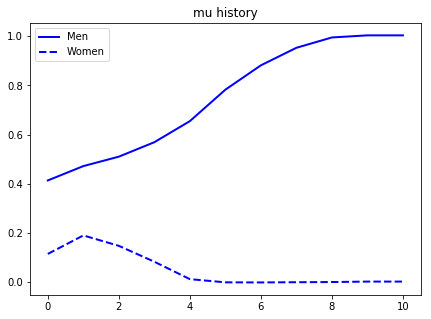

In [484]:
f, ax = plt.subplots(figsize = (7,5))
ax.set_title('mu history')
ax.plot(mu_history[:,0],'k',linewidth=2,color='blue',label='Men')
ax.plot(mu_history[:,1],'k--',linewidth=2,color='blue',label='Women')
ax.legend()


In [443]:
log_P_history


array([   1.        , -254.86615006, -207.16658049, -207.00587831,
       -206.74301711, -206.29204173, -205.46870676, -203.80799211,
       -199.86703944, -187.7650897 , -138.68407926,  -43.34122165,
        -24.70025883,   -6.01816123,   31.70096269,   60.95118204,
         61.24944943,   61.24944943,   61.24944943,   61.24944943,
         61.24944943])

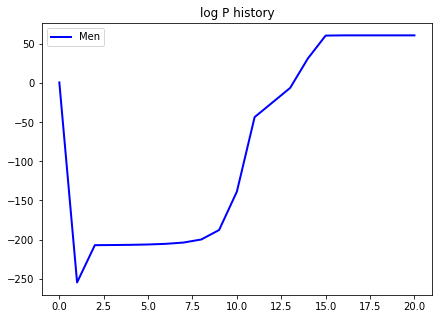

In [444]:
f, ax = plt.subplots(figsize = (7,5))
ax.set_title('log P history')
ax.plot(log_P_history,'k',linewidth=2,color='blue',label='Men')
ax.legend()